In [1]:
import scipy.io
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Data of .mat format

In [5]:


import scipy.io
import pandas as pd
import glob
import os

# Define the path to your folder containing .mat files
folder_path = '/content/Cub_flight_data_mat/'  # Replace with the correct path

# Get all .mat file paths in the folder
mat_files = glob.glob(os.path.join(folder_path, '*.mat'))

# Defined the header columns from the provided format by looking into the header file given
columns = [
    'Time', 'Euler_Angle_Phi', 'Euler_Angle_Theta', 'Euler_Angle_Psi',
    'Accel_x', 'Accel_y', 'Accel_z', 'Rot_Rate_x', 'Rot_Rate_y', 'Rot_Rate_z',
    'Mag_x', 'Mag_y', 'Mag_z', 'Vel_x', 'Vel_y', 'Vel_z', 'V_tot_mps',
    'Lat', 'Long', 'Easting', 'Northing', 'Alt', 'Battery_Voltage', 'Battery_Current',
    'Motor_Rotation_Rate', 'Motor_PWM_Throttle', 'Aileron_defl', 'Elevator_defl',
    'Rudder_defl', 'Flap_defl', 'Airspeed', 'Pressure', 'Temp', 'A_x', 'A_y', 'A_z',
    'Rot_Rate_x_filt', 'Rot_Rate_y_filt', 'Rot_Rate_z_filt', 'u_mps', 'v_mps', 'w_mps',
    'alpha_deg', 'beta_deg'
]

In [6]:
# Initialize a list to store data from all files
data_frames = []

# Loop through each .mat file
for mat_file in mat_files:
    print(f"Loading file: {mat_file}")

    # Load the .mat file
    mat_data = scipy.io.loadmat(mat_file)

    # Print the keys to see the structure of the .mat file (adjust this based on your file's structure)
    print(f"Keys in the file: {mat_data.keys()}")

    # Example: The data may be stored under a specific key, e.g., 'data'
    # You will need to inspect and replace 'your_key' with the actual key from the .mat file
    data = mat_data['data_to_output']  # Replace 'your_key' with the actual key

    # Convert the data into a pandas DataFrame with the specified column names
    df = pd.DataFrame(data, columns=columns)

    # Append the DataFrame to the list
    data_frames.append(df)

Loading file: /content/Cub_flight_data_mat/data_421_632-635_elev_resp_3U_round.mat
Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'data_to_output'])
Loading file: /content/Cub_flight_data_mat/data_420_497-507_rud_resp_L_R_short.mat
Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'data_to_output'])
Loading file: /content/Cub_flight_data_mat/data_420_412-416_rud_resp_L_short.mat
Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'data_to_output'])
Loading file: /content/Cub_flight_data_mat/data_421_834-853_spin_no_flap_R_high_rate.mat
Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'data_to_output'])
Loading file: /content/Cub_flight_data_mat/data_418_474-498_3_stall_no_flap_low_rate.mat
Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'data_to_output'])
Loading file: /content/Cub_flight_data_mat/data_420_890-927_phugoid_full_flap_push_entry.mat
Keys in the file: dict

In [7]:
#combine all DataFrames into one large DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# View the first few rows of the combined DataFrame
print(combined_df.head())

                 Time       Euler_Angle_Phi     Euler_Angle_Theta  \
0  632.0000+  0.0000j -19.228626+ 0.000000j -58.333305+ 0.000000j   
1  632.0025+  0.0000j -19.221607+ 0.000000j -58.336468+ 0.000000j   
2  632.0050+  0.0000j -19.222424+ 0.000000j -58.349930+ 0.000000j   
3  632.0075+  0.0000j -19.216867+ 0.000000j -58.354515+ 0.000000j   
4  632.0100+  0.0000j -19.206684+ 0.000000j -58.348366+ 0.000000j   

        Euler_Angle_Psi             Accel_x             Accel_y  \
0 -16.287781+ 0.000000j -2.809657+0.000000j -0.507208+0.000000j   
1 -16.318375+ 0.000000j -2.623441+0.000000j -0.550017+0.000000j   
2 -16.340797+ 0.000000j -0.774513+0.000000j  0.102188+0.000000j   
3 -16.370903+ 0.000000j -3.363598+0.000000j -1.647198+0.000000j   
4 -16.406586+ 0.000000j -2.399163+0.000000j  0.424310+0.000000j   

              Accel_z          Rot_Rate_x          Rot_Rate_y  \
0 -0.426617+0.000000j -7.804029+0.000000j  0.558806+0.000000j   
1  2.783590+0.000000j -7.971447+0.000000j  0.784895+

In [8]:
# changing DataFrame  contains complex numbers to real
combined_df_real = combined_df.applymap(lambda x: x.real if isinstance(x, complex) else x)

# Check the first few rows to verify
print(combined_df_real.head())


<ipython-input-8-984567f6b51d>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df_real = combined_df.applymap(lambda x: x.real if isinstance(x, complex) else x)


       Time  Euler_Angle_Phi  Euler_Angle_Theta  Euler_Angle_Psi   Accel_x  \
0  632.0000       -19.228626         -58.333305       -16.287781 -2.809657   
1  632.0025       -19.221607         -58.336468       -16.318375 -2.623441   
2  632.0050       -19.222424         -58.349930       -16.340797 -0.774513   
3  632.0075       -19.216867         -58.354515       -16.370903 -3.363598   
4  632.0100       -19.206684         -58.348366       -16.406586 -2.399163   

    Accel_y   Accel_z  Rot_Rate_x  Rot_Rate_y  Rot_Rate_z  ...       A_y  \
0 -0.507208 -0.426617   -7.804029    0.558806   -7.283783  ... -0.054324   
1 -0.550017  2.783590   -7.971447    0.784895   -6.875207  ... -0.066179   
2  0.102188  0.906026   -8.329087   -3.664237   -6.609756  ... -0.069736   
3 -1.647198 -2.010422   -8.114629    0.161631   -6.754829  ... -0.076009   
4  0.424310  2.147713   -8.440299    4.654251   -6.653186  ... -0.060234   

        A_z  Rot_Rate_x_filt  Rot_Rate_y_filt  Rot_Rate_z_filt  u_mps  v_m

In [9]:
df=combined_df_real

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228753 entries, 0 to 228752
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 228753 non-null  float64
 1   Euler_Angle_Phi      228753 non-null  float64
 2   Euler_Angle_Theta    228753 non-null  float64
 3   Euler_Angle_Psi      228753 non-null  float64
 4   Accel_x              228753 non-null  float64
 5   Accel_y              228753 non-null  float64
 6   Accel_z              228753 non-null  float64
 7   Rot_Rate_x           228753 non-null  float64
 8   Rot_Rate_y           228753 non-null  float64
 9   Rot_Rate_z           228753 non-null  float64
 10  Mag_x                228753 non-null  float64
 11  Mag_y                228753 non-null  float64
 12  Mag_z                228753 non-null  float64
 13  Vel_x                2480 non-null    float64
 14  Vel_y                2480 non-null    float64
 15  Vel_z            

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew




Looking up for missing values

In [14]:
df.isnull().sum()

,0
Time,0
Euler_Angle_Phi,0
Euler_Angle_Theta,0
Euler_Angle_Psi,0
Accel_x,0
Accel_y,0
Accel_z,0
Rot_Rate_x,0
Rot_Rate_y,0
Rot_Rate_z,0


In [15]:
df.describe()

,Time,Euler_Angle_Phi,Euler_Angle_Theta,Euler_Angle_Psi,Accel_x,Accel_y,Accel_z,Rot_Rate_x,Rot_Rate_y,Rot_Rate_z,...,A_y,A_z,Rot_Rate_x_filt,Rot_Rate_y_filt,Rot_Rate_z_filt,u_mps,v_mps,w_mps,alpha_deg,beta_deg
count,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,...,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,745.875517,-0.700245,-9.020469,-79.883223,-0.769239,0.155391,-10.577609,1.795774,1.521483,0.798366,...,0.155395,-10.577349,1.795769,1.521506,0.798353,14.995894,-0.808929,1.919414,7.885833,-3.165507
std,220.359573,19.655431,22.269621,82.748009,1.258707,1.541313,6.061093,43.203092,20.954911,23.368586,...,1.114368,5.532973,42.792288,20.574607,23.150680,4.698722,2.578413,3.394623,10.812013,10.615278
min,270.000000,-179.858658,-89.881310,-179.992172,-32.644279,-30.093920,-63.427086,-242.164566,-145.811800,-114.834665,...,-10.224377,-48.273031,-247.574625,-140.596892,-116.798623,0.338480,-11.747398,-13.972446,-72.929608,-51.134171
25%,544.215000,-6.259490,-16.874826,-133.135117,-1.540335,-0.372726,-12.259414,-4.532612,-5.952000,-4.056942,...,-0.118589,-11.697310,-4.467038,-5.772674,-4.087027,11.728232,-2.477545,0.421081,1.687522,-9.603901
50%,770.162500,-0.638309,-7.768036,-117.703308,-0.809359,0.138118,-9.631414,-0.874162,0.276796,0.000000,...,0.188351,-9.542390,-1.018236,0.502594,0.028935,15.035902,-0.987261,1.534678,5.997509,-3.911603
75%,923.430000,4.525178,3.780060,-18.088409,-0.016942,0.728222,-7.497802,3.440039,8.028743,4.471535,...,0.492859,-7.914562,3.505315,8.021899,4.502233,18.187866,0.901693,2.632819,11.287443,3.192359
max,1112.000000,179.933105,64.524826,179.998894,12.362137,40.876255,46.962063,262.040529,105.997192,139.496487,...,7.155314,13.456281,266.101923,103.240215,142.822922,29.253429,9.735516,77.719414,85.073025,57.698064


Looking for columns with high correlation (>7)

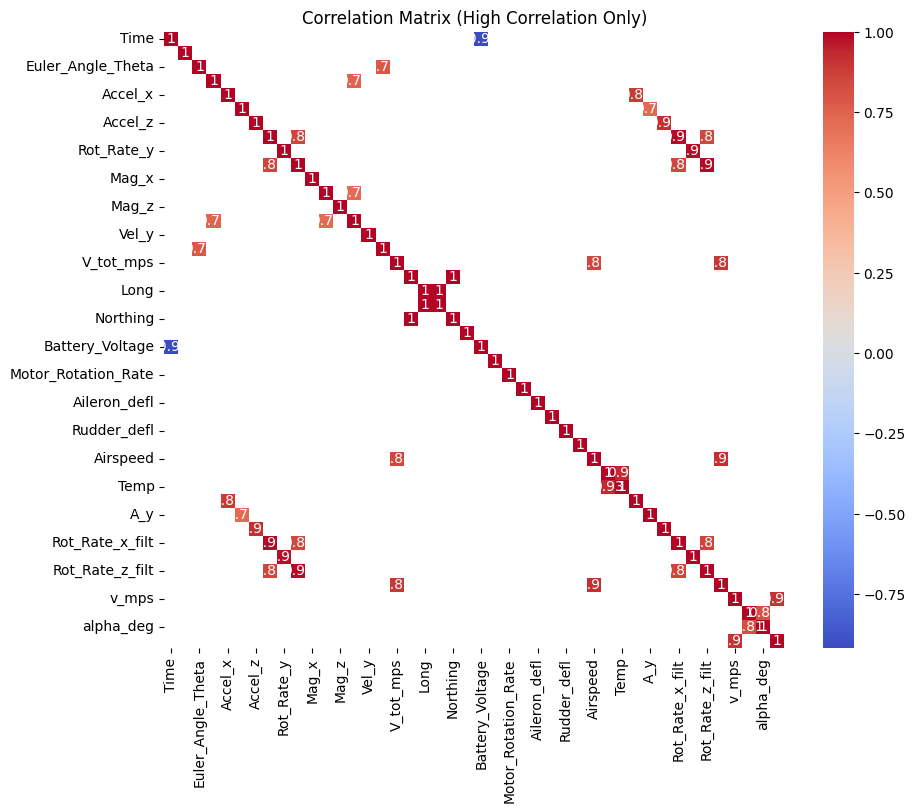

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set a threshold for high correlation (e.g., 0.7)
threshold = 0.7

# Create a filtered correlation matrix
filtered_corr_matrix = corr_matrix[corr_matrix.abs() > threshold]

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (High Correlation Only)")
plt.show()

In [17]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set a threshold for high correlation (e.g., 0.7)
threshold = 0.7

# Create a list of highly correlated pairs with their correlation values
highly_correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print the list of highly correlated pairs
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]} are highly correlated with a correlation coefficient of {pair[2]:.2f}")




Rot_Rate_z and Rot_Rate_x are highly correlated with a correlation coefficient of 0.85
Vel_x and Euler_Angle_Psi are highly correlated with a correlation coefficient of 0.75
Vel_x and Mag_y are highly correlated with a correlation coefficient of 0.72
Vel_z and Euler_Angle_Theta are highly correlated with a correlation coefficient of 0.78
Easting and Long are highly correlated with a correlation coefficient of 1.00
Northing and Lat are highly correlated with a correlation coefficient of 1.00
Battery_Voltage and Time are highly correlated with a correlation coefficient of -0.92
Airspeed and V_tot_mps are highly correlated with a correlation coefficient of 0.85
Temp and Pressure are highly correlated with a correlation coefficient of 0.93
A_x and Accel_x are highly correlated with a correlation coefficient of 0.89
A_y and Accel_y are highly correlated with a correlation coefficient of 0.72
A_z and Accel_z are highly correlated with a correlation coefficient of 0.91
Rot_Rate_x_filt and Rot

In [18]:
# Drop 'Long' and 'Lat' since they are perfectly correlated with 'Easting' and 'Northing'
df = df.drop(columns=['Long', 'Lat'])


Missing values in highly correlated columns were filled using linear interpolation

In [19]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression imputation
df_filtered = df[['Vel_x', 'Euler_Angle_Psi']].dropna()  # Drop rows with missing values in both columns

# Build regression model
X = df_filtered[['Euler_Angle_Psi']]  # Predictor
y = df_filtered['Vel_x']  # Target

model = LinearRegression()
model.fit(X, y)

# Impute missing values in Vel_x where Euler_Angle_Psi is available
missing_vel_x = df['Vel_x'].isnull() & df['Euler_Angle_Psi'].notnull()
df.loc[missing_vel_x, 'Vel_x'] = model.predict(df.loc[missing_vel_x, ['Euler_Angle_Psi']])


In [20]:
df['Vel_x'].isnull().sum()

0

In [21]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression imputation
df_filtered = df[['Vel_z', 'Euler_Angle_Theta']].dropna()  # Drop rows with missing values in both columns

# Build regression model
X = df_filtered[['Euler_Angle_Theta']]  # Predictor
y = df_filtered['Vel_z']  # Target

model = LinearRegression()
model.fit(X, y)

# Impute missing values in Vel_x where Euler_Angle_Theta is available
missing_vel_z = df['Vel_z'].isnull() & df['Euler_Angle_Theta'].notnull()
df.loc[missing_vel_z, 'Vel_z'] = model.predict(df.loc[missing_vel_z, ['Euler_Angle_Theta']])


In [22]:
df['Vel_z'].isnull().sum()

0

In [23]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression imputation
df_filtered = df[['Battery_Voltage', 'Time']].dropna()  # Drop rows with missing values in both columns

# Build regression model
X = df_filtered[['Time']]  # Predictor
y = df_filtered['Battery_Voltage']  # Target

model = LinearRegression()
model.fit(X, y)

# Impute missing values in Battery_Voltage where Time is available
missing_Battery_Voltage = df['Battery_Voltage'].isnull() & df['Time'].notnull()
df.loc[missing_Battery_Voltage, 'Battery_Voltage'] = model.predict(df.loc[missing_Battery_Voltage, ['Time']])


In [24]:
df['Battery_Voltage'].isnull().sum()

0

cases where both correlated columns had missing values, I used the iterative imputer to fill them

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select columns with high correlation to impute together
columns_to_impute = ['Vel_x', 'Euler_Angle_Psi', 'Vel_z', 'Euler_Angle_Theta',
                     'Easting',  'Northing', 'Airspeed', 'V_tot_mps','u_mps','alpha_deg','w_mps','beta_deg','v_mps']

imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df[columns_to_impute]), columns=columns_to_impute)

# Replace the original dataframe with imputed values
df[columns_to_impute] = df_imputed


In [26]:
df.isnull().sum()

,0
Time,0
Euler_Angle_Phi,0
Euler_Angle_Theta,0
Euler_Angle_Psi,0
Accel_x,0
Accel_y,0
Accel_z,0
Rot_Rate_x,0
Rot_Rate_y,0
Rot_Rate_z,0


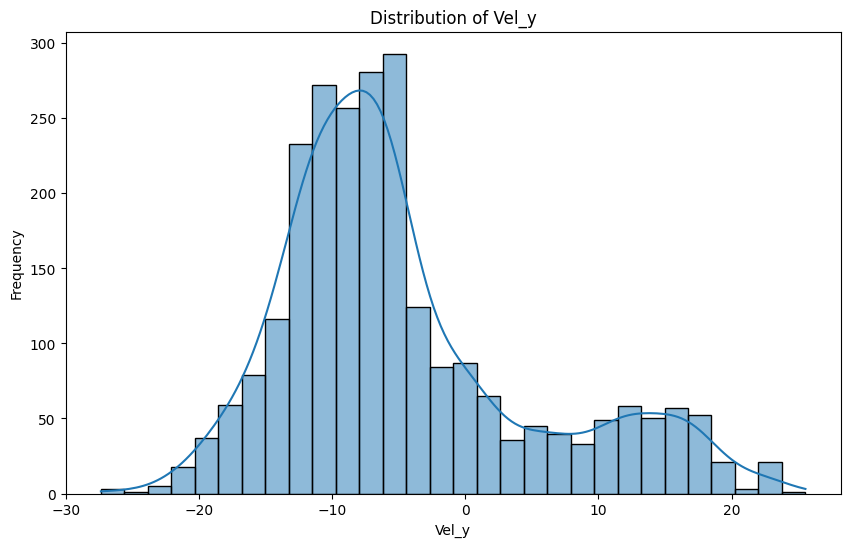

In [27]:
Vel_y_data = df['Vel_y'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(Vel_y_data, kde=True, bins=30)
plt.title('Distribution of Vel_y')
plt.xlabel('Vel_y')
plt.ylabel('Frequency')
plt.show()

Distribution is left skewed, so filling with median

In [28]:
df['Vel_y'] = df['Vel_y'].fillna(df['Vel_y'].median())

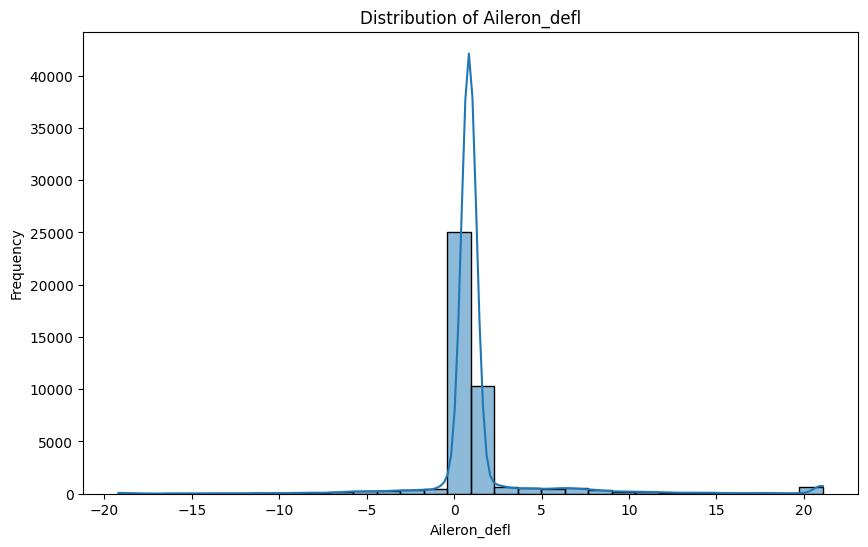

In [29]:
Aileron_defl_data = df['Aileron_defl'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(Aileron_defl_data, kde=True, bins=30)
plt.title('Distribution of Aileron_defl')
plt.xlabel('Aileron_defl')
plt.ylabel('Frequency')
plt.show()

Distribution is close to normal, so filling with mean

In [30]:
df['Aileron_defl'] = df['Aileron_defl'].fillna(df['Aileron_defl'].mean())

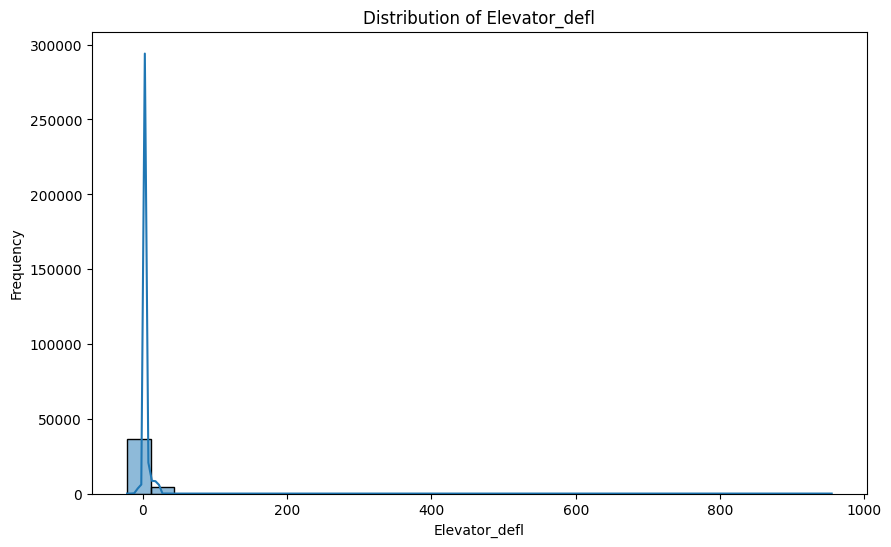

In [31]:
Elevator_defl_data = df['Elevator_defl'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(Elevator_defl_data, kde=True, bins=30)
plt.title('Distribution of Elevator_defl')
plt.xlabel('Elevator_defl')
plt.ylabel('Frequency')
plt.show()

Distribution is left skewed, so filling with median

In [32]:
df['Elevator_defl'] = df['Elevator_defl'].fillna(df['Elevator_defl'].median())

In [33]:
# Create a boolean Series indicating whether 'Elevator_defl' is greater than 10
greater_than_10 = df['Elevator_defl'] > 10

# Count the True values (i.e., rows where 'Elevator_defl' > 10)
count = greater_than_10.sum()

print("Number of rows with 'Elevator_defl' greater than 10:", count)

Number of rows with 'Elevator_defl' greater than 10: 5409


In [34]:
values_greater_than_100 = df[df['Elevator_defl'] > 100]['Elevator_defl']
print(values_greater_than_100)

71117     713.734159
207100    365.333763
211177    557.441946
211261    338.949548
211416    790.247249
211509    627.370468
211635    602.072146
211669    954.714685
Name: Elevator_defl, dtype: float64


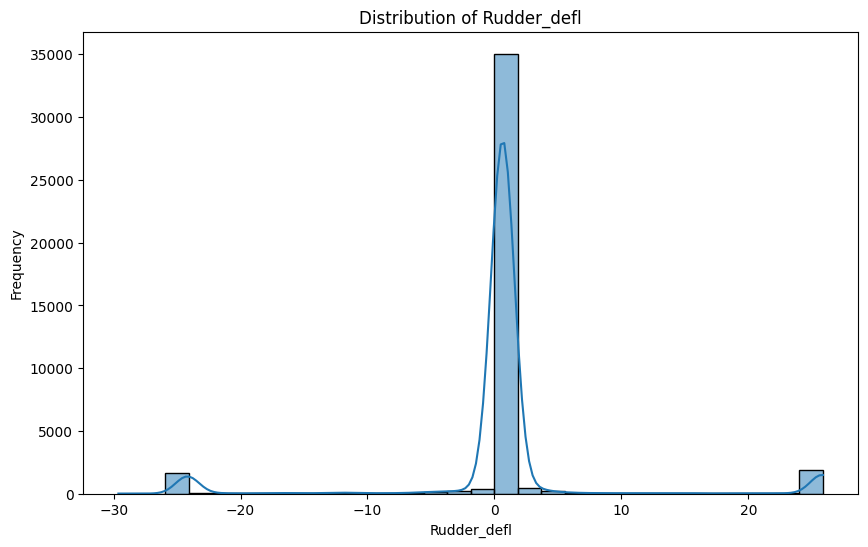

In [35]:
Rudder_defl_data = df['Rudder_defl'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(Rudder_defl_data, kde=True, bins=30)
plt.title('Distribution of Rudder_defl')
plt.xlabel('Rudder_defl')
plt.ylabel('Frequency')
plt.show()

Distribution is close to normal, so filling with mean

In [36]:
df['Rudder_defl'] = df['Rudder_defl'].fillna(df['Rudder_defl'].mean())

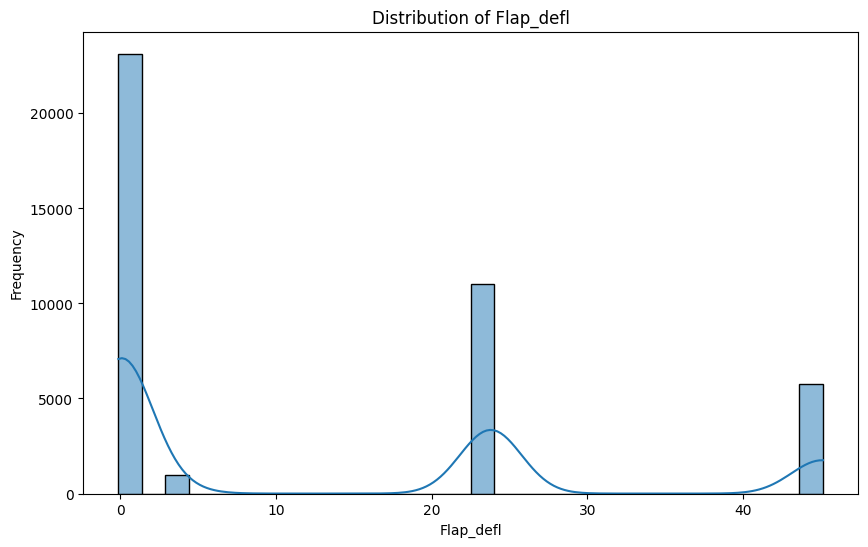

In [37]:
Flap_defl_data = df['Flap_defl'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(Flap_defl_data, kde=True, bins=30)
plt.title('Distribution of Flap_defl')
plt.xlabel('Flap_defl')
plt.ylabel('Frequency')
plt.show()

Distribution is left skewed, so filling with median

In [38]:
df['Flap_defl'] = df['Flap_defl'].fillna(df['Flap_defl'].median())

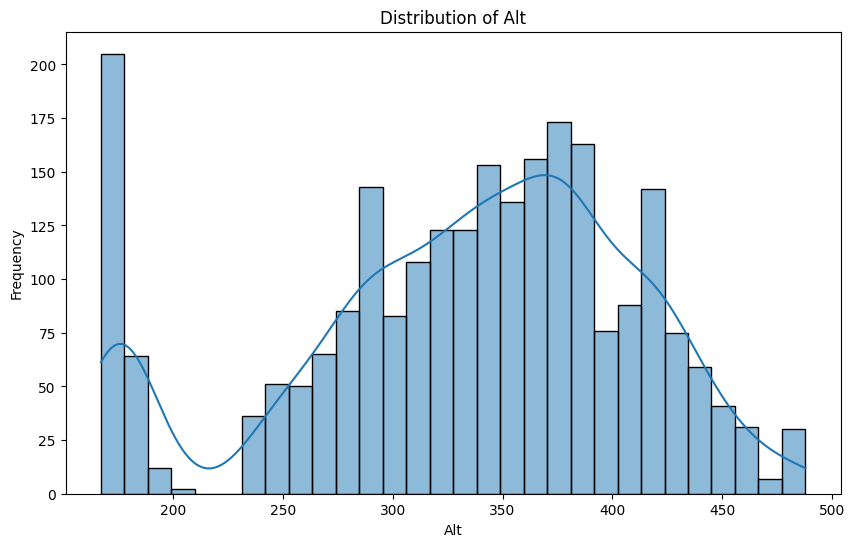

In [39]:
Alt_data = df['Alt'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(Alt_data, kde=True, bins=30)
plt.title('Distribution of Alt')
plt.xlabel('Alt')
plt.ylabel('Frequency')
plt.show()

Distribution is close to normal, so filling with mean

In [40]:
df['Alt'] = df['Alt'].fillna(df['Alt'].mean())

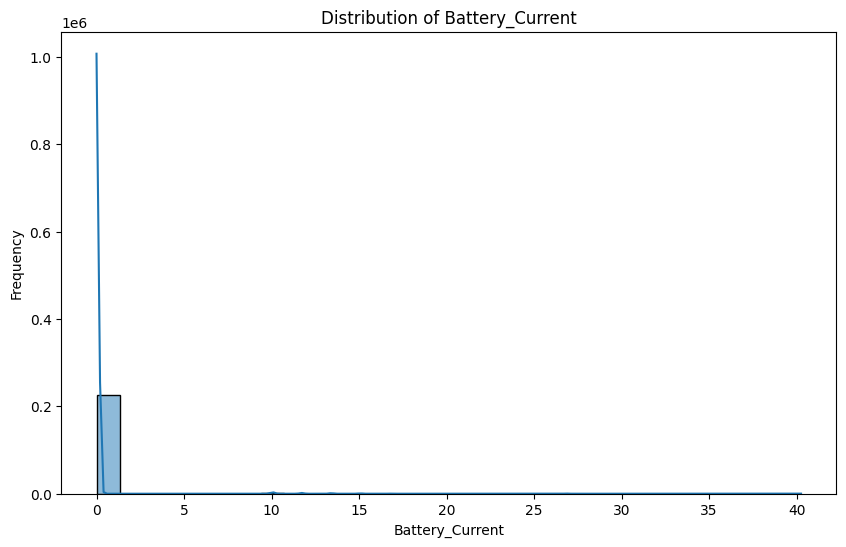

In [41]:
Battery_Current_data = df['Battery_Current'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(Battery_Current_data, kde=True, bins=30)
plt.title('Distribution of Battery_Current')
plt.xlabel('Battery_Current')
plt.ylabel('Frequency')
plt.show()

In [42]:
df['Battery_Current'].describe()

,Battery_Current
count,228217.000000
mean,0.120506
std,1.414628
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,40.254652


In [43]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter rows where Battery_Current is greater than 0
df_filtered = df[df['Battery_Current'] > 0]

# Print the filtered DataFrame
print(df_filtered['Battery_Current'])

65        0.024486
66        0.024486
67        0.024486
68        0.024486
69        0.024486
            ...   
228184    0.024486
228185    0.024486
228186    0.024486
228187    0.024486
228188    0.024486
Name: Battery_Current, Length: 28054, dtype: float64


In [44]:

unique_values = df['Battery_Current'].unique()
print(unique_values)

[0.0000000e+00 2.4486000e-02           nan 4.8972000e-02 1.5083252e+01
 1.3442703e+01 1.1728697e+01 1.0088149e+01 1.1753183e+01 1.3418217e+01
 1.0063663e+01 1.3393732e+01 2.6860921e+01 1.0039177e+01 1.5058766e+01
 1.1704212e+01 1.8437806e+01 2.1792360e+01 1.6772772e+01 4.0254652e+01
 3.3545544e+01]


In [45]:
value_counts = df['Battery_Current'].value_counts()
print(value_counts)

Battery_Current
0.000000     200163
0.024486      25890
10.063663       432
0.048972        256
11.728697       256
10.088149       220
13.418217       168
15.083252       128
11.753183        92
26.860921        88
13.442703        84
10.039177        84
40.254652        48
21.792360        44
16.772772        44
13.393732        44
18.437806        44
11.704212        44
15.058766        44
33.545544        44
Name: count, dtype: int64


In [46]:

# Fill missing values in 'Battery_Current' with 0
df['Battery_Current'] = df['Battery_Current'].fillna(0)



In [47]:
df.isnull().sum()

,0
Time,0
Euler_Angle_Phi,0
Euler_Angle_Theta,0
Euler_Angle_Psi,0
Accel_x,0
Accel_y,0
Accel_z,0
Rot_Rate_x,0
Rot_Rate_y,0
Rot_Rate_z,0


In [48]:
df.describe()

,Time,Euler_Angle_Phi,Euler_Angle_Theta,Euler_Angle_Psi,Accel_x,Accel_y,Accel_z,Rot_Rate_x,Rot_Rate_y,Rot_Rate_z,...,A_y,A_z,Rot_Rate_x_filt,Rot_Rate_y_filt,Rot_Rate_z_filt,u_mps,v_mps,w_mps,alpha_deg,beta_deg
count,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,...,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000,228753.000000
mean,745.875517,-0.700245,-9.020469,-79.883223,-0.769239,0.155391,-10.577609,1.795774,1.521483,0.798366,...,0.155395,-10.577349,1.795769,1.521506,0.798353,15.007240,-0.807427,1.918452,7.909608,-3.158015
std,220.359573,19.655431,22.269621,82.748009,1.258707,1.541313,6.061093,43.203092,20.954911,23.368586,...,1.114368,5.532973,42.792288,20.574607,23.150680,1.505900,0.305488,0.480977,2.160946,1.340434
min,270.000000,-179.858658,-89.881310,-179.992172,-32.644279,-30.093920,-63.427086,-242.164566,-145.811800,-114.834665,...,-10.224377,-48.273031,-247.574625,-140.596892,-116.798623,0.338480,-11.747398,-13.972446,-72.929608,-51.134171
25%,544.215000,-6.259490,-16.874826,-133.135117,-1.540335,-0.372726,-12.259414,-4.532612,-5.952000,-4.056942,...,-0.118589,-11.697310,-4.467038,-5.772674,-4.087027,14.761361,-0.879642,1.827233,7.516554,-3.540241
50%,770.162500,-0.638309,-7.768036,-117.703308,-0.809359,0.138118,-9.631414,-0.874162,0.276796,0.000000,...,0.188351,-9.542390,-1.018236,0.502594,0.028935,14.974640,-0.837275,1.926760,7.685029,-3.246025
75%,923.430000,4.525178,3.780060,-18.088409,-0.016942,0.728222,-7.497802,3.440039,8.028743,4.471535,...,0.492859,-7.914562,3.505315,8.021899,4.502233,15.244547,-0.712246,2.006472,8.529985,-2.699573
max,1112.000000,179.933105,64.524826,179.998894,12.362137,40.876255,46.962063,262.040529,105.997192,139.496487,...,7.155314,13.456281,266.101923,103.240215,142.822922,29.253429,9.735516,77.719414,85.073025,57.698064


In [49]:
from sklearn.preprocessing import StandardScaler


removing columns with high corellation

In [51]:
import pandas as pd
import numpy as np

# Assuming your dataset is stored in 'dfs'
correlation_matrix = df.corr().abs()  # Compute the absolute correlation matrix

# Set a threshold for correlation, e.g., 0.85
threshold = 0.7

# Identify pairs of highly correlated features
high_corr_pairs = np.where(correlation_matrix > threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Create a set to track features that will be dropped
to_drop = set()

# Go through the list of highly correlated pairs and drop one feature from each pair
for feature1, feature2 in high_corr_pairs:
    to_drop.add(feature2)  # Drop the second feature from each pair

# Drop the identified features from the dataset
df= df.drop(columns=list(to_drop))

print(f"Columns removed due to high correlation: {list(to_drop)}")
print(f"Remaining columns: {list(df.columns)}")

# Now 'dfs_reduced' will have the highly correlated features removed


Columns removed due to high correlation: ['Rot_Rate_x_filt', 'A_y', 'A_z', 'Rot_Rate_z_filt', 'u_mps', 'Temp', 'Vel_x', 'alpha_deg', 'beta_deg', 'Rot_Rate_z', 'A_x', 'Vel_z', 'Battery_Voltage', 'Rot_Rate_y_filt', 'Airspeed', 'Northing']
Remaining columns: ['Time', 'Euler_Angle_Phi', 'Euler_Angle_Theta', 'Euler_Angle_Psi', 'Accel_x', 'Accel_y', 'Accel_z', 'Rot_Rate_x', 'Rot_Rate_y', 'Mag_x', 'Mag_y', 'Mag_z', 'Vel_y', 'V_tot_mps', 'Easting', 'Alt', 'Battery_Current', 'Motor_Rotation_Rate', 'Motor_PWM_Throttle', 'Aileron_defl', 'Elevator_defl', 'Rudder_defl', 'Flap_defl', 'Pressure', 'v_mps', 'w_mps']


In [52]:
df['Euler_Angle_Phi'].describe()

,Euler_Angle_Phi
count,228753.000000
mean,-0.700245
std,19.655431
min,-179.858658
25%,-6.259490
50%,-0.638309
75%,4.525178
max,179.933105


In [53]:
df['Euler_Angle_Theta'].describe()

,Euler_Angle_Theta
count,228753.000000
mean,-9.020469
std,22.269621
min,-89.881310
25%,-16.874826
50%,-7.768036
75%,3.780060
max,64.524826


In [54]:
df['Euler_Angle_Psi'].describe()

,Euler_Angle_Psi
count,228753.000000
mean,-79.883223
std,82.748009
min,-179.992172
25%,-133.135117
50%,-117.703308
75%,-18.088409
max,179.998894


In [55]:
initial_df= df

creating stability condition colum based on Euler angles which describe the orientation of an aircraft in 3D space

In [56]:
# Define thresholds for stable conditions based on domain knowledge
threshold_phi = 20  #used these values based on looking at data
threshold_theta = 35
threshold_psi = 120

# Create a new column 'stable_condition' (1: Stable, 0: Unstable)
df['stable_condition'] = ((df['Euler_Angle_Phi'].abs() < threshold_phi) &
                          (df['Euler_Angle_Theta'].abs() < threshold_theta) &
                          (df['Euler_Angle_Psi'].abs() < threshold_psi)).astype(int)


In [57]:
df['stable_condition'].value_counts()

,count
stable_condition,
0,144650
1,84103


creating total control deflection column based on all controls

In [58]:
df['total_control_deflection'] = (df['Aileron_defl'] +
                                           df['Elevator_defl'] +
                                           df['Rudder_defl'] +
                                           df['Flap_defl'])


In [61]:

# Step 4: Prepare the feature matrix (X) and target variable (y)
# Use all relevant columns for prediction (excluding Time and stable_condition target)
features = [col for col in df.columns if col != 'stable_condition' and col != 'Time' and col != 'Euler_Angle_Phi' and col != 'Euler_Angle_Theta' and col != 'Euler_Angle_Theta']
X = df[features]  # Feature matrix
y = df['stable_condition']

In [62]:
y.value_counts()

,count
stable_condition,
0,144650
1,84103


# **Classification**

Logistic regression

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report  # Import classification_report

In [65]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


I have runned this cell before It took me 20 min for the first time , got accuracy around 91%, however it was taking me more than 30 min the last time I was running

In [67]:
'''
# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Perform Grid Search for hyperparameter tuning to get the best accuracy
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type (L1 or L2)
    'solver': ['liblinear']         # Solver to use (liblinear works with l1 and l2 penalties)
}

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
'''

"\n# Initialize Logistic Regression model\nlogistic_model = LogisticRegression()\n\n# Perform Grid Search for hyperparameter tuning to get the best accuracy\nparam_grid = {\n    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength\n    'penalty': ['l1', 'l2'],        # Regularization type (L1 or L2)\n    'solver': ['liblinear']         # Solver to use (liblinear works with l1 and l2 penalties)\n}\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')\ngrid_search.fit(X_train, y_train)\n"

In [68]:
'''
# Get the best model and its parameters
best_model = grid_search.best_estimator_

# Train the best model on the training data
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)'''

'\n# Get the best model and its parameters\nbest_model = grid_search.best_estimator_\n\n# Train the best model on the training data\nbest_model.fit(X_train_scaled, y_train)\n\n# Make predictions on the test data\ny_pred = best_model.predict(X_test_scaled)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, y_pred)\nclassification_rep = classification_report(y_test, y_pred)\n\n# Print the results\nprint(f"Best Parameters: {grid_search.best_params_}")\nprint(f"Accuracy: {accuracy}")\nprint("Classification Report:")\nprint(classification_rep)'

In [69]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np



In [70]:
'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define a hyperparameter grid to search through, but with ranges for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),        # Number of trees in the forest (100 to 1000)
    'max_depth': [None, 10, 20, 30, 40, 50],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                        # Whether bootstrap samples are used when building trees
}

# Perform Randomized Search to find the best hyperparameters
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Train the model using Randomized Search
random_search_rf.fit(X_train_scaled, y_train)

# Get the best model from Randomized Search
best_rf_model = random_search_rf.best_estimator_

# Train the best model on the training data
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_rep = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_classification_rep)
'''

'\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Initialize Random Forest Classifier\nrf_model = RandomForestClassifier(random_state=42)\n\n# Define a hyperparameter grid to search through, but with ranges for RandomizedSearchCV\nparam_dist = {\n    \'n_estimators\': np.arange(100, 1000, 100),        # Number of trees in the forest (100 to 1000)\n    \'max_depth\': [None, 10, 20, 30, 40, 50],          # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],                  # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],                    # Minimum number of samples required to be at a leaf node\n    \'bootstrap\': [True, False]                        # Whether bootstrap samples are used when building trees\n}\n\n# Perform Randomized Search to find the best hyperparameters\nrandom_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_d

Xgboost classifier

In [73]:
# Imports
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np



# Standardize the feature data
scaler = StandardScaler()

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define the hyperparameter space for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': np.arange(50, 400, 50),   # Number of boosting rounds (trees)
    'learning_rate': np.logspace(-3, 0, 10),  # Learning rate (shrinkage)
    'max_depth': np.arange(3, 10, 1),         # Maximum tree depth
    'subsample': np.linspace(0.5, 1, 5),      # Subsample ratio of the training instance
    'colsample_bytree': np.linspace(0.5, 1, 5),  # Subsample ratio of columns
    'gamma': np.logspace(-3, 1, 5),           # Minimum loss reduction required for a split
}

# Randomized Search for XGBoost hyperparameters
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=5,               # Limit the number of iterations for faster search
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Use accuracy to evaluate performance
    random_state=42,
    n_jobs=-1                 # Use all available cores for parallel processing
)


In [74]:

# Create a pipeline with scaling and model
pipeline_xgb = Pipeline([
    ('scaler', scaler),
    ('xgb', random_search_xgb)
])

# Train the model using RandomizedSearchCV
pipeline_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = random_search_xgb.best_estimator_

# Make predictions on the test data
y_pred_xgb = pipeline_xgb.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_classification_rep = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"Best Parameters: {random_search_xgb.best_params_}")
print(f"Accuracy: {xgb_accuracy}")
print("Classification Report:")
print(xgb_classification_rep)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.875, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.046415888336127774, 'gamma': 0.001, 'colsample_bytree': 0.875}
Accuracy: 0.9953225066118774
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28711
           1       0.99      1.00      0.99     17040

    accuracy                           1.00     45751
   macro avg       0.99      1.00      1.00     45751
weighted avg       1.00      1.00      1.00     45751



# **Regression**

In [78]:
'''# Reduce the number of trees in the Random Forest to speed up training
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced number of trees to 50
features = [col for col in df.columns if col != 'Time' and col != 'Aileron_defl' and col != 'Elevator_defl' and col != 'Rudder_defl' and col != 'Flap_defl' ]
dfs = df[features]  # Feature matrix
#y = df['total_control_deflection']

# Sample a subset of the data for faster processing (optional)
# You can remove this step if you want to train on all the data
df_sampled = dfs.sample(frac=0.15, random_state=42)  # 10% of the data
X_sampled = df_sampled.drop(columns=['total_control_deflection'])
y_sampled = df_sampled['total_control_deflection']

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Feature selection using RandomForestRegressor's feature importance
rf_regressor.fit(X_train, y_train)

# Get feature importances and select top features (e.g., top 5 features)
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Select top 5 important features
top_features = X_train.columns[indices[:15]]

print("Selected Best Features:")
print(top_features)
'''

'# Reduce the number of trees in the Random Forest to speed up training\nrf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced number of trees to 50\nfeatures = [col for col in df.columns if col != \'Time\' and col != \'Aileron_defl\' and col != \'Elevator_defl\' and col != \'Rudder_defl\' and col != \'Flap_defl\' ]\ndfs = df[features]  # Feature matrix\n#y = df[\'total_control_deflection\']\n\n# Sample a subset of the data for faster processing (optional)\n# You can remove this step if you want to train on all the data\ndf_sampled = dfs.sample(frac=0.15, random_state=42)  # 10% of the data\nX_sampled = df_sampled.drop(columns=[\'total_control_deflection\'])\ny_sampled = df_sampled[\'total_control_deflection\']\n\n# Split the sampled data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)\n\n# Feature selection using RandomForestRegressor\'s feature importance\nrf_regresso

### **Regression**

**Predicting total_control_deflection**

In [110]:
features = [col for col in df.columns if  col !='total_control_deflection' and col != 'Aileron_defl' and col != 'Elevator_defl' and col != 'Rudder_defl' and col != 'Flap_defl' ]
dfs1 = df[features]  # Feature matrix

X = dfs1[features]  # Features
y = df['total_control_deflection']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import time
import numpy as np

# Standardize the features (LightGBM doesn't require scaling, but it can help in certain cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling the training data
X_test_scaled = scaler.transform(X_test)        # Scaling the test data

# Initialize the LightGBM Regressor
lgbm_reg = lgb.LGBMRegressor(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size
    max_depth=5,            # Maximum depth of a tree
    subsample=0.8,          # Fraction of samples used for each tree
    colsample_bytree=0.8,   # Fraction of features used per tree
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all available cores for parallel computation
)

# Perform cross-validation
start_time = time.time()

# Using cross_val_score to perform 5-fold cross-validation and evaluate the model's R2 score
cv_scores = cross_val_score(lgbm_reg, X_train_scaled, y_train, cv=5, scoring='r2')

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Cross-validation completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Print the cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score from CV: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R² scores: {cv_scores.std():.4f}")

# Fit the model on the entire training data for final evaluation
lgbm_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lgbm_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the performance on the test set
print("\nPerformance on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5336
[LightGBM] [Info] Number of data points in the train set: 146401, number of used features: 23
[LightGBM] [Info] Start training from score 7.430179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [83]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import time
# Standardize the features (XGBoost benefits from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Regressor model
xg_reg = xgb.XGBRegressor(
    n_estimators=100,           # Number of boosting rounds
    learning_rate=0.1,          # Learning rate (step size)
    max_depth=5,                # Maximum depth of a tree
    subsample=0.8,              # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,       # Fraction of features used for each tree
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available cores for parallel computation
)

# Start the timer for training time
start_time = time.time()

# Fit the model on the training data
xg_reg.fit(X_train_scaled, y_train)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Predict on the test set
y_pred = xg_reg.predict(X_test_scaled)

# Evaluate the model using R2 score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

Training completed in 0 minutes and 2 seconds.
R2 Score: 0.0853617470313075
Mean Squared Error: 94.64551549268714


In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



# Standardizing the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Adjusted R²: Adjusted for the number of predictors
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print("Performance Metrics for Linear Regression Model:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Performance Metrics for Linear Regression Model:
R²: 0.0687
Adjusted R²: 0.0682
Mean Squared Error (MSE): 96.3700
Root Mean Squared Error (RMSE): 9.8168
Mean Absolute Error (MAE): 5.1581
Model Coefficients: [ 0.9913252  -0.1484358   0.5047185   0.0186439  -0.00348717 -0.08157777
 -0.29404841 -0.74095949  0.48352269 -0.0436314   0.11249556 -0.02446857
 -0.04512398 -0.03098288 -0.05650023  0.05747783  0.22474123 -2.14079131
  0.20853411 -0.05169346  0.04737772  0.02004835  0.05308645]
Model Intercept: 7.442563203708242


**Predicting Aileron_defl**

In [88]:
features = [col for col in df.columns if  col != 'Aileron_defl'  and col != 'total_control_deflection' and col != 'stable_condition']
dfs1 = df[features]  # Feature matrix

X = dfs1[features]  # Features
y = df['Aileron_defl']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
import time
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Standardize the features (XGBoost benefits from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Regressor model
xg_reg = xgb.XGBRegressor(
    n_estimators=100,           # Number of boosting rounds
    learning_rate=0.1,          # Learning rate (step size)
    max_depth=5,                # Maximum depth of a tree
    subsample=0.8,              # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,       # Fraction of features used for each tree
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available cores for parallel computation
)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for R²
cv_r2_scores = cross_val_score(xg_reg, X_train_scaled, y_train, cv=kf, scoring='r2')

# Cross-validation for MSE (neg_mean_squared_error as sklearn requires minimizing metrics)
cv_mse_scores = cross_val_score(xg_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# Since MSE scores are negative (because sklearn minimizes it), we take the absolute values
cv_mse_scores = -cv_mse_scores

# Print Cross-Validation Results
print("Cross-Validation Results:")
print(f"Average R² from cross-validation: {np.mean(cv_r2_scores):.4f}")
print(f"Average MSE from cross-validation: {np.mean(cv_mse_scores):.4f}")

# Start the timer for training time
start_time = time.time()

# Fit the model on the training data
xg_reg.fit(X_train_scaled, y_train)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Predict on the test set
y_pred = xg_reg.predict(X_test_scaled)

# Evaluate the model using R2 score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nPerformance on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


Cross-Validation Results:
Average R² from cross-validation: 0.7366
Average MSE from cross-validation: 0.5554
Training completed in 0 minutes and 2 seconds.

Performance on Test Data:
R² Score: 0.7457
Mean Squared Error (MSE): 0.4441


In [90]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



# Standardizing the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Adjusted R²: Adjusted for the number of predictors
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print("Performance Metrics for Linear Regression Model:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Performance Metrics for Linear Regression Model:
R²: 0.0222
Adjusted R²: 0.0217
Mean Squared Error (MSE): 1.7075
Root Mean Squared Error (RMSE): 1.3067
Mean Absolute Error (MAE): 0.3461
Model Coefficients: [ 0.10580681  0.04575887  0.00030558 -0.06385156 -0.043218   -0.09821472
  0.09882843  0.14112533  0.07605024 -0.00984297 -0.00921067  0.01617939
 -0.0048169   0.00089803  0.00971633 -0.00091165 -0.01099387  0.02950501
 -0.01514245 -0.03651755 -0.0114912  -0.08027009  0.00030618  0.01486063
  0.01401578]
Model Intercept: 1.378976465728197


In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Initialize the MLP Regressor (Neural Network)
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the timer for training time
start_time = time.time()

# Fit the model on the training data
mlp_reg.fit(X_train_scaled, y_train)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Predict on the test set
y_pred = mlp_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


Training completed in 3 minutes and 47 seconds.
R² Score: 0.6451687733605397
Mean Squared Error (MSE): 0.6196450486749018


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [92]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import time
import numpy as np

# Standardize the features (LightGBM doesn't require scaling, but it can help in certain cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling the training data
X_test_scaled = scaler.transform(X_test)        # Scaling the test data

# Initialize the LightGBM Regressor
lgbm_reg = lgb.LGBMRegressor(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size
    max_depth=5,            # Maximum depth of a tree
    subsample=0.8,          # Fraction of samples used for each tree
    colsample_bytree=0.8,   # Fraction of features used per tree
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all available cores for parallel computation
)

# Perform cross-validation
start_time = time.time()

# Using cross_val_score to perform 5-fold cross-validation and evaluate the model's R2 score
cv_scores = cross_val_score(lgbm_reg, X_train_scaled, y_train, cv=5, scoring='r2')

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Cross-validation completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Print the cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score from CV: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R² scores: {cv_scores.std():.4f}")

# Fit the model on the entire training data for final evaluation
lgbm_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lgbm_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the performance on the test set
print("\nPerformance on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 146401, number of used features: 25
[LightGBM] [Info] Start training from score 1.380398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [93]:
'''from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Initialize the KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Use 5 nearest neighbors

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the timer for training time
start_time = time.time()

# Fit the model on the training data
knn_reg.fit(X_train_scaled, y_train)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Predict on the test set
y_pred = knn_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
'''

'from sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.metrics import r2_score, mean_squared_error\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nimport time\n\n# Initialize the KNN Regressor\nknn_reg = KNeighborsRegressor(n_neighbors=5)  # Use 5 nearest neighbors\n\n# Standardize the features\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Start the timer for training time\nstart_time = time.time()\n\n# Fit the model on the training data\nknn_reg.fit(X_train_scaled, y_train)\n\n# End the timer and calculate elapsed time\nend_time = time.time()\nelapsed_time = end_time - start_time\nminutes, seconds = divmod(elapsed_time, 60)\n\n# Training time display\nprint(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")\n\n# Predict on the test set\ny_pred = knn_reg.predict(X_test_scaled)\n\n# Evaluate the model using R² score and 

**Predicting Elevator_defl**

In [103]:
features = [col for col in df.columns if  col != 'Elevator_defl' and col != 'total_control_deflection' and col != 'stable_condition' ]
dfs1 = df[features]  # Feature matrix

X = dfs1[features]  # Features
y = df['Elevator_defl']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import time
import numpy as np

# Standardize the features (LightGBM doesn't require scaling, but it can help in certain cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling the training data
X_test_scaled = scaler.transform(X_test)        # Scaling the test data

# Initialize the LightGBM Regressor
lgbm_reg = lgb.LGBMRegressor(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size
    max_depth=5,            # Maximum depth of a tree
    subsample=0.8,          # Fraction of samples used for each tree
    colsample_bytree=0.8,   # Fraction of features used per tree
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all available cores for parallel computation
)

# Perform cross-validation
start_time = time.time()

# Using cross_val_score to perform 5-fold cross-validation and evaluate the model's R2 score
cv_scores = cross_val_score(lgbm_reg, X_train_scaled, y_train, cv=5, scoring='r2')

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Cross-validation completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Print the cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score from CV: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R² scores: {cv_scores.std():.4f}")

# Fit the model on the entire training data for final evaluation
lgbm_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lgbm_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the performance on the test set
print("\nPerformance on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 146401, number of used features: 25
[LightGBM] [Info] Start training from score 2.956775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [104]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Initialize the MLP Regressor (Neural Network)
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the timer for training time
start_time = time.time()

# Fit the model on the training data
mlp_reg.fit(X_train_scaled, y_train)

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Predict on the test set
y_pred = mlp_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


Training completed in 4 minutes and 39 seconds.
R² Score: -0.2763317221367989
Mean Squared Error (MSE): 11.141115835129103


In [96]:
print(df.head())

       Time  Euler_Angle_Phi  Euler_Angle_Theta  Euler_Angle_Psi   Accel_x  \
0  632.0000       -19.228626         -58.333305       -16.287781 -2.809657   
1  632.0025       -19.221607         -58.336468       -16.318375 -2.623441   
2  632.0050       -19.222424         -58.349930       -16.340797 -0.774513   
3  632.0075       -19.216867         -58.354515       -16.370903 -3.363598   
4  632.0100       -19.206684         -58.348366       -16.406586 -2.399163   

    Accel_y   Accel_z  Rot_Rate_x  Rot_Rate_y     Mag_x  ...  \
0 -0.507208 -0.426617   -7.804029    0.558806  0.000000  ...   
1 -0.550017  2.783590   -7.971447    0.784895  0.000000  ...   
2  0.102188  0.906026   -8.329087   -3.664237  0.000000  ...   
3 -1.647198 -2.010422   -8.114629    0.161631  1.152836  ...   
4  0.424310  2.147713   -8.440299    4.654251  0.000000  ...   

   Motor_PWM_Throttle  Aileron_defl  Elevator_defl  Rudder_defl  Flap_defl  \
0            0.006421      1.377145       2.571538     0.712645   0.

In [97]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variable respectively
X = dfs1[features]  # Features
y = df['Elevator_defl']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross-Validation

# Define the scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for R² and MSE
cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=r2_scorer)
cv_mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=mse_scorer)

# Fit the model on the full training set after cross-validation
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Adjusted R² calculation
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the performance metrics for cross-validation and final model
print("Cross-Validation Metrics (on training data):")
print(f"Average R² from cross-validation: {np.mean(cv_r2_scores):.4f}")
print(f"Average MSE from cross-validation: {np.mean(cv_mse_scores):.4f}")

print("\nPerformance Metrics on Test Data:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Cross-Validation Metrics (on training data):
Average R² from cross-validation: 0.0483
Average MSE from cross-validation: -22.8847

Performance Metrics on Test Data:
R²: 0.0696
Adjusted R²: 0.0691
Mean Squared Error (MSE): 8.1214
Root Mean Squared Error (RMSE): 2.8498
Mean Absolute Error (MAE): 0.8841
Model Coefficients: [ 0.1034297   0.05371029 -0.24559506  0.14618206  0.31109877 -0.04780599
 -0.21893159  0.18951086  0.12540911  0.0038341  -0.01317512  0.03802487
  0.00283853 -0.01663974 -0.1023342   0.03149698 -0.02964002  0.03040685
 -0.04861771 -0.12181849  0.43524573  0.37850702 -0.01689108  0.00167517
  0.03680996]
Model Intercept: 2.968969263672718


**predicting Rudder_defl**

In [105]:
features = [col for col in df.columns if  col != 'Rudder_defl' and col != 'total_control_deflection' and col != 'stable_condition' ]
dfs1 = df[features]  # Feature matrix

X = dfs1[features]  # Features
y = df['Rudder_defl']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import time
import numpy as np

# Standardize the features (LightGBM doesn't require scaling, but it can help in certain cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling the training data
X_test_scaled = scaler.transform(X_test)        # Scaling the test data

# Initialize the LightGBM Regressor
lgbm_reg = lgb.LGBMRegressor(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size
    max_depth=5,            # Maximum depth of a tree
    subsample=0.8,          # Fraction of samples used for each tree
    colsample_bytree=0.8,   # Fraction of features used per tree
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all available cores for parallel computation
)

# Perform cross-validation
start_time = time.time()

# Using cross_val_score to perform 5-fold cross-validation and evaluate the model's R2 score
cv_scores = cross_val_score(lgbm_reg, X_train_scaled, y_train, cv=5, scoring='r2')

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Cross-validation completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Print the cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score from CV: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R² scores: {cv_scores.std():.4f}")

# Fit the model on the entire training data for final evaluation
lgbm_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lgbm_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the performance on the test set
print("\nPerformance on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 146401, number of used features: 25
[LightGBM] [Info] Start training from score 0.717320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [99]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler



# Standardizing the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross-Validation

# Define the scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for R² and MSE
cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=r2_scorer)
cv_mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=mse_scorer)

# Fit the model on the full training set after cross-validation
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Adjusted R² calculation
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the performance metrics for cross-validation and final model
print("Cross-Validation Metrics (on training data):")
print(f"Average R² from cross-validation: {np.mean(cv_r2_scores):.4f}")
print(f"Average MSE from cross-validation: {np.mean(cv_mse_scores):.4f}")

print("\nPerformance Metrics on Test Data:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Cross-Validation Metrics (on training data):
Average R² from cross-validation: 0.0771
Average MSE from cross-validation: -9.5784

Performance Metrics on Test Data:
R²: 0.0870
Adjusted R²: 0.0865
Mean Squared Error (MSE): 9.3011
Root Mean Squared Error (RMSE): 3.0498
Mean Absolute Error (MAE): 0.7594
Model Coefficients: [ 0.07708552 -0.19834125  0.05340015 -0.01943078  0.01505632 -0.06253089
  0.00549787 -0.80526521  0.02859159 -0.04052251  0.05488794 -0.03268929
 -0.03488535  0.0052941   0.04931857 -0.00860804 -0.00087463 -0.03191991
 -0.02816415 -0.02407342  0.27333512  0.06315191 -0.01198655  0.06726034
 -0.01837112]
Model Intercept: 0.7157577669086401


**Flap_defl**

In [107]:
features = [col for col in df.columns if  col != 'Flap_defl' and col != 'total_control_deflection' and col != 'stable_condition' ]
dfs1 = df[features]  # Feature matrix

X = dfs1[features]  # Features
y = df['Flap_defl']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import time
import numpy as np

# Standardize the features (LightGBM doesn't require scaling, but it can help in certain cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling the training data
X_test_scaled = scaler.transform(X_test)        # Scaling the test data

# Initialize the LightGBM Regressor
lgbm_reg = lgb.LGBMRegressor(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size
    max_depth=5,            # Maximum depth of a tree
    subsample=0.8,          # Fraction of samples used for each tree
    colsample_bytree=0.8,   # Fraction of features used per tree
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all available cores for parallel computation
)

# Perform cross-validation
start_time = time.time()

# Using cross_val_score to perform 5-fold cross-validation and evaluate the model's R2 score
cv_scores = cross_val_score(lgbm_reg, X_train_scaled, y_train, cv=5, scoring='r2')

# End the timer and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

# Training time display
print(f"Cross-validation completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Print the cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score from CV: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R² scores: {cv_scores.std():.4f}")

# Fit the model on the entire training data for final evaluation
lgbm_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lgbm_reg.predict(X_test_scaled)

# Evaluate the model using R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the performance on the test set
print("\nPerformance on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 146401, number of used features: 25
[LightGBM] [Info] Start training from score 2.375686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [109]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler



# Standardizing the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross-Validation

# Define the scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for R² and MSE
cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=r2_scorer)
cv_mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=mse_scorer)

# Fit the model on the full training set after cross-validation
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Adjusted R² calculation
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the performance metrics for cross-validation and final model
print("Cross-Validation Metrics (on training data):")
print(f"Average R² from cross-validation: {np.mean(cv_r2_scores):.4f}")
print(f"Average MSE from cross-validation: {np.mean(cv_mse_scores):.4f}")

print("\nPerformance Metrics on Test Data:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Cross-Validation Metrics (on training data):
Average R² from cross-validation: 0.0709
Average MSE from cross-validation: -67.3675

Performance Metrics on Test Data:
R²: 0.0776
Adjusted R²: 0.0771
Mean Squared Error (MSE): 68.1211
Root Mean Squared Error (RMSE): 8.2535
Mean Absolute Error (MAE): 4.1668
Model Coefficients: [ 6.77368475e-01  2.40843417e-03  7.09122472e-01 -7.76560015e-02
 -3.58093671e-01  1.04616980e-01 -8.17332380e-02 -6.63487062e-02
  2.42795929e-01  1.31868521e-02  5.81298836e-02 -3.43811846e-02
 -2.02366626e-03 -1.71002254e-02  2.03010252e-03  2.87177391e-02
  2.52148463e-01 -2.03834975e+00  2.90877651e-01 -4.48166063e-01
  6.33501349e-01  1.68305839e-01 -1.60430695e-02 -4.25575460e-02
 -9.37686274e-03]
Model Intercept: 2.3788597073986706
